# 多項式回帰
(2次以上の関数で回帰↔線形回帰モデル) ※ここでは説明変数が2つで、うち1つが目的変数と曲線的な関係を持つものを考える

In [1]:
#データの準備

#ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#データの読み込み
from sklearn.datasets import load_boston
boston=load_boston()
df_data=pd.DataFrame(boston.data,columns=boston.feature_names)
df_target=pd.DataFrame(boston.target,columns=["MEDV"])
df=pd.concat([df_data,df_target],axis=1)

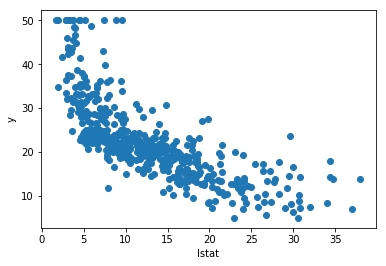

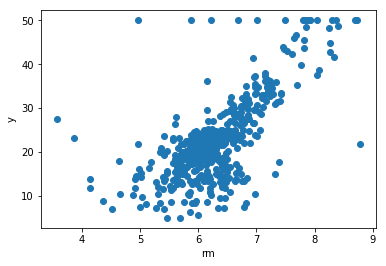

In [2]:
#データの観察
lstat=df_data.loc[:,["LSTAT"]].values
rm=df_data.loc[:,["RM"]].values
y=df_target.values

plt.scatter(lstat,y)
plt.xlabel("lstat")
plt.ylabel("y")
plt.show()

plt.scatter(rm,y)
plt.xlabel("rm")
plt.ylabel("y")
plt.show()

adjusted R^2 train: 0.5512067066861285
adjusted R^2 test: 0.5186169856299738


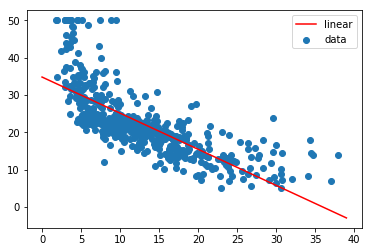

In [3]:
#単回帰分析(1次関数)

#データの分割
from sklearn.model_selection import train_test_split
lstat_train,lstat_test,y_train,y_test=train_test_split(lstat,y,
                                    test_size=0.3,random_state=0)
#データの学習
from sklearn.linear_model import LinearRegression
model_1para_linear=LinearRegression()
model_1para_linear.fit(lstat_train,y_train)
#自由度調整済み決定係数
def adjusted(score,n_sample,n_features):
    adjusted=1-(1-score)*((n_sample-1)/(n_sample-n_features-1))
    return adjusted
print("adjusted R^2 train:",adjusted(model_1para_linear.score(lstat_train,y_train),len(lstat_train),1))
print("adjusted R^2 test:",adjusted(model_1para_linear.score(lstat_test,y_test),len(lstat_test),1))
#回帰直線を散布図上にプロット
plt.scatter(lstat,y,label="data")
x=np.arange(0,40,1)[:,np.newaxis]
plt.plot(x,model_1para_linear.predict(x),color="red",label="linear")
plt.legend()
plt.show()

adjusted R^2 train: 0.6568979972099722
adjusted R^2 test: 0.5937523939799303


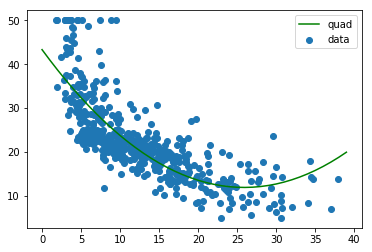

In [4]:
#単回帰分析(2次関数)

#変数変換
from sklearn.preprocessing import PolynomialFeatures
quad=PolynomialFeatures(degree=2)
lstat_quad=quad.fit_transform(lstat)
x_quad=quad.fit_transform(x)
#データの分割
from sklearn.model_selection import train_test_split
lstat_quad_train,lstat_quad_test,y_train,y_test=train_test_split(
    lstat_quad,y,test_size=0.3,random_state=0)
#データの学習
from sklearn.linear_model import LinearRegression
model_para1_quad=LinearRegression()
model_para1_quad.fit(lstat_quad_train,y_train)
#精度(自由度調整済み決定係数)の出力
def adjusted(score,n_sample,n_features):
    adjusted=1-(1-score)*((n_sample-1)/(n_sample-n_features-1))
    return adjusted
print("adjusted R^2 train:",adjusted(model_para1_quad.score
                (lstat_quad_train,y_train),len(lstat_quad_train),1))
print("adjusted R^2 test:",adjusted(model_para1_quad.score
                (lstat_quad_test,y_test),len(lstat_quad_test),1))
#回帰曲線を散布図上に出力
plt.scatter(lstat,y,label="data")
plt.plot(x,model_para1_quad.predict(x_quad),color="green",label="quad")
plt.legend()
plt.show()

adjusted R^2 train: 0.6741637993743813
adjusted R^2 test: 0.6120167362737146


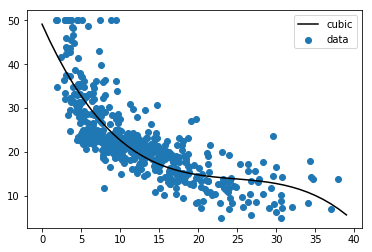

In [5]:
#単回帰分析(3次関数)

#変数変換
from sklearn.preprocessing import PolynomialFeatures
cubic=PolynomialFeatures(degree=3)
lstat_cubic=cubic.fit_transform(lstat)
x_cubic=cubic.fit_transform(x)
#データの分割
from sklearn.model_selection import train_test_split
lstat_cubic_train,lstat_cubic_test,y_train,y_test=train_test_split(
                 lstat_cubic,y,test_size=0.3,random_state=0)
#データの学習
from sklearn.linear_model import LinearRegression
model_para1_cubic=LinearRegression()
model_para1_cubic.fit(lstat_cubic_train,y_train)
#精度(自由度調整済み決定係数)の出力
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score
print("adjusted R^2 train:",adjusted(model_para1_cubic.score
            (lstat_cubic_train,y_train),len(lstat_cubic_train),1))
print("adjusted R^2 test:",adjusted(model_para1_cubic.score
            (lstat_cubic_test,y_test),len(lstat_cubic_test),1))
#回帰曲線を散布図上に出力
plt.scatter(lstat,y,label="data")
plt.plot(x,model_para1_cubic.predict(x_cubic),color="black",label="cubic")
plt.legend()
plt.show()

In [6]:
#重回帰分析(1次関数)

#データの準備
X=np.hstack((lstat,rm))
X_quad=np.hstack((lstat_quad,rm))
X_cubic=np.hstack((lstat_cubic,rm))
#データの分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                    test_size=0.3,random_state=0)
X_quad_train,X_quad_test,y_train,y_test=train_test_split(X_quad,y,
                                    test_size=0.3,random_state=0)
X_cubic_train,X_cubic_test,y_train,y_test=train_test_split(X_cubic,y,
                                    test_size=0.3,random_state=0)
#データの学習
from sklearn.linear_model import LinearRegression
model_para2=LinearRegression()
model_para2.fit(X_train,y_train)
model_para2_quad=LinearRegression()
model_para2_quad.fit(X_quad_train,y_train)
model_para2_cubic=LinearRegression()
model_para2_cubic.fit(X_cubic_train,y_train)
#精度(自由度調整済み決定係数)の出力
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score
print("normal train:",adjusted(model_para2.score(X_train,y_train),len(X_train),2))
print("normal test:",adjusted(model_para2.score(X_test,y_test),len(X_test),2))
print("quad train:",adjusted(model_para2_quad.score(X_quad_train,y_train),len(X_quad_train),2))
print("quad test:",adjusted(model_para2_quad.score(X_quad_test,y_test),len(X_quad_test),2))
print("cubic train:",adjusted(model_para2_cubic.score(X_cubic_train,y_train),len(X_cubic_train),2))
print("cubic test:",adjusted(model_para2_cubic.score(X_cubic_test,y_test),len(X_cubic_test),2))

normal train: 0.648955100801442
normal test: 0.6017037819383948
quad train: 0.7264647803875862
quad test: 0.63254631136445
cubic train: 0.7290657204840469
cubic test: 0.6329828597381153
